In [1]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime
import os

In [3]:
import glob
mountFileName = "../../../Desktop/IRAP_mount/Generative_Adversarial_Network/matrices_CEGAN/"
localFileName = 'matrices_CEGAN/'
autoencoderTrainingMount = "../../../Desktop/IRAP_mount/IonosphericSignalRecontruction/AE_training_results/"
autoencoderTrainingLocal = "../IonosphericSignalRecontruction/AE_training_results/"

In [4]:
def DisplayGraphWithInfos(array, infos, title, axs, axy, axn, fig):
    x_lims = list()
    x_lims.append(infos[0]+datetime.timedelta(hours=7))
    x_lims.append(x_lims[0]+datetime.timedelta(days=infos[5]))
    x_lims = mdates.date2num(x_lims)
    axs[axy][axn].xaxis_date()
    axs[axy][axn].imshow(array, origin='lower', cmap=plt.get_cmap('jet') , aspect='auto',extent=[x_lims[0],x_lims[1],infos[2],infos[1]])
    x_lims = mdates.DateFormatter("%H:%M")
    axs[axy][axn].xaxis.set_major_formatter(x_lims)
    axs[axy][axn].set_title("{} - {}/{}/{} - Quiet: {}".format(title, infos[0].year, infos[0].month, infos[0].day, infos[6]))
    axs[axy][axn].set_xlabel("Time")
    axs[axy][axn].set_ylabel("Latitude")
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'), norm=plt.Normalize(vmin=infos[4], vmax=infos[3]))
    sm._A = []
    clb=fig.colorbar(sm, ax=axs[axy][axn])
    clb.set_label("nT")

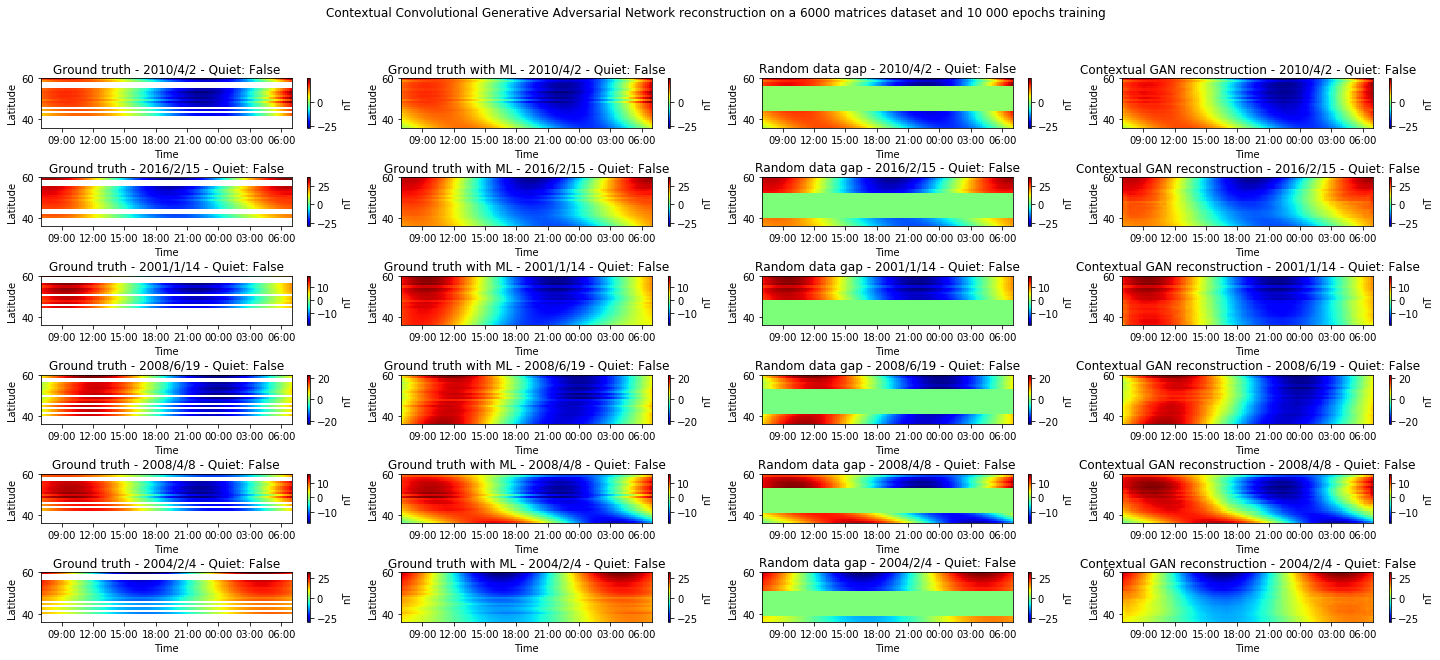

In [5]:
trainingArray = []
epoch = 10000

for i in range(0,6):
    AE_saveName = "AE_training_epoch{}_matrix{}.npy".format(epoch, i)
    GAN_saveName = "CEGAN_lines_epoch{}_matrix{}.npy".format(epoch, i)
    trainingArray.append(np.load('{}{}'.format(mountFileName, GAN_saveName), allow_pickle=True, encoding="latin1"))
trainingArray = np.asarray(trainingArray)
    
numberOfPlots = 6
fig, axs = plt.subplots(numberOfPlots,4, figsize=(25, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1., wspace=.15)

axs = axs.ravel().reshape(numberOfPlots,4)

fig.suptitle("Contextual Convolutional Generative Adversarial Network reconstruction on a 6000 matrices dataset and 10 000 epochs training")

for y in range(numberOfPlots):
    DisplayGraphWithInfos(trainingArray[y][0], trainingArray[y][4], "Ground truth", axs, y, 0, fig)
    DisplayGraphWithInfos(trainingArray[y][1], trainingArray[y][4], "Ground truth with ML", axs, y, 1, fig)
    DisplayGraphWithInfos(trainingArray[y][2], trainingArray[y][4], "Random data gap", axs, y, 2, fig)
    DisplayGraphWithInfos(trainingArray[y][3], trainingArray[y][4], "Contextual GAN reconstruction", axs, y, 3, fig)
    
fig.savefig("NeuralNet_predictions")

In [6]:
# from keras.models import model_from_json
from tensorflow.keras.models import load_model, model_from_json
json_file = open('../../../Desktop/IRAP_mount/Generative_Adversarial_Network/saved_model_CEGAN/generator.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
generator = model_from_json(loaded_model_json)
# load weights into new model
generator.load_weights("../../../Desktop/IRAP_mount/Generative_Adversarial_Network/saved_model_CEGAN/generator_weights.hdf5")

json_file = open('../../../Desktop/IRAP_mount/Generative_Adversarial_Network/saved_model_CEGAN/discriminator.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
discriminator = model_from_json(loaded_model_json)
# load weights into new model
discriminator.load_weights("../../../Desktop/IRAP_mount/Generative_Adversarial_Network/saved_model_CEGAN/discriminator_weights.hdf5")

0 0.8983727447925631
1 0.8683048333689685
2 0.8397084701790365
3 0.8125836552227674
4 0.7869303885001606
5 0.4200168550014496
6 0.3877525329589844
7 0.3949686884880066
8 0.3760886490345001
9 0.37355124950408936
10 0.37820500135421753
11 0.35756629705429077
12 0.3718632459640503
13 0.3674054443836212
14 0.368175208568573
15 0.4046366512775421
16 0.39149633049964905
17 0.5980578563104255
18 0.6040989140268516
19 0.5818570456956391
20 0.5766086807165813
21 0.5759717339662405
22 0.5927839595126365
23 0.5534888175981809


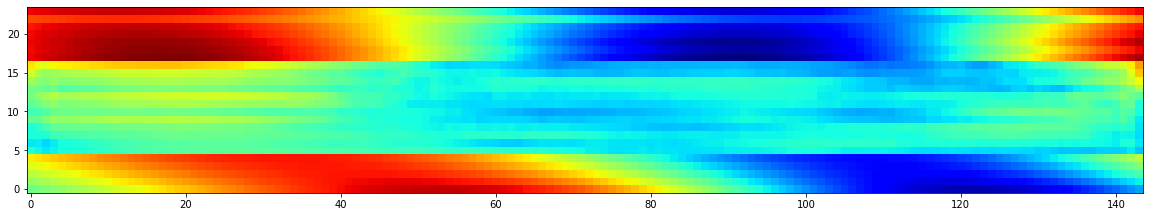

In [15]:
import math

plt.figure(figsize=(20,10))
prediction = generator.predict(trainingArray[4][2].reshape(1, 24,144,1))

displayArray = trainingArray[4][2].copy()
for i in range(displayArray.shape[0]):
    print(i, trainingArray[4][2][i][50])
    if np.sum(displayArray[i]) == 72:
        displayArray[i] = prediction[i-5]
        
plt.imshow(displayArray, origin='lower', cmap=plt.get_cmap('jet'))
plt.show()